# Extract geological age from debris flow basins

This notebook represents work in progress.  It aims to extract statistics about the geological age of the rocks underlying the debris flow basins.
The data sources are the digized versions of the Geological maps of the different states:

Location of geological map (CA):

https://mrdata.usgs.gov/geology/state/state.php?state=CA

There is no numerical age in these maps, only the unit name according to the geological time scale.  The data is joined with a tabular representation of the geological time scale to obtain a numerical age range associated with each unit. 

This notebook appends 2 new features(rock age_min,age_max) to and generates new file  

In [1]:
import xarray as xr
import rioxarray as rxr 
import rasterio
import pandas as pd
import geopandas as gpd

In [2]:
states=['NM', 'CA', 'UT', 'CO', 'MT', 'AZ', 'ID']

Load shapefiles with geological map information. They should already have been retrieved from the [rock type extraction notebook](../data_preparation/extract_rock_type.ipynb) and placed in `../data_preparation/geological_map`.

However, the files are too large for github repository and are therefore deleted before committing. If you need to run the notebook but have not run the previous prep notebooks, the below cell must be run.

In [3]:
# if files don't exist this will generate

states=['NM', 'CA', 'UT', 'CO', 'MT', 'AZ', 'ID']
odir = "../../data/geological_map"
from os.path import isfile, isdir
from posix import mkdir 

if not isdir(odir):
    mkdir(odir)

for state in states:
    url="https://mrdata.usgs.gov/geology/state/shp/" + state + ".zip"
    ofile=odir + "/" + state + ".zip"
    print(url)
    if not isfile(ofile):
        !curl -o $ofile $url 
        !unzip -d $odir $ofile

https://mrdata.usgs.gov/geology/state/shp/NM.zip
https://mrdata.usgs.gov/geology/state/shp/CA.zip
https://mrdata.usgs.gov/geology/state/shp/UT.zip
https://mrdata.usgs.gov/geology/state/shp/CO.zip
https://mrdata.usgs.gov/geology/state/shp/MT.zip
https://mrdata.usgs.gov/geology/state/shp/AZ.zip
https://mrdata.usgs.gov/geology/state/shp/ID.zip


In [4]:
%%time
## NOTE
## Please read above
##

# creates a list of dataframes for each state
odir = "../../data/geological_map"
polys = [gpd.read_file(odir + "/" + state + "_geol_poly.shp") for state in states]

CPU times: user 24.3 s, sys: 498 ms, total: 24.8 s
Wall time: 24.8 s


In [5]:
polys[0]

STATE ORIG_LABEL SGMC_LABEL UNIT_LINK REF_ID  \
0       NM          D        D;0     NMD;0  NM001   
1       NM          D        D;0     NMD;0  NM001   
2       NM          D        D;0     NMD;0  NM001   
3       NM          J        J;0     NMJ;0  NM001   
4       NM          J        J;0     NMJ;0  NM001   
...    ...        ...        ...       ...    ...   
9464    NM        YXp      YXp;0   NMYXp;0  NM001   
9465    NM        YXp      YXp;0   NMYXp;0  NM001   
9466    NM        YXp      YXp;0   NMYXp;0  NM002   
9467    NM        YXp      YXp;0   NMYXp;0  NM001   
9468    NM        YXp      YXp;0   NMYXp;0  NM001   

                         GENERALIZE  \
0     Sedimentary, undifferentiated   
1     Sedimentary, undifferentiated   
2     Sedimentary, undifferentiated   
3     Sedimentary, undifferentiated   
4     Sedimentary, undifferentiated   
...                             ...   
9464             Igneous, intrusive   
9465             Igneous, intrusive   
9466             Igneous, intrusive   
9467             Igneous, intrusive   
9468             Igneous, intrusive   

                                         SRC_URL  \
0     https://pubs.usgs.gov/of/1997/ofr-97-0052/   
1     https://pubs.usgs.gov/of/1997/ofr-97-0052/   
2     https://pubs.usgs.gov/of/1997/ofr-97-0052/   
3     https://pubs.usgs.gov/of/1997/ofr-97-0052/   
4     https://pubs.usgs.gov/of/1997/ofr-97-0052/   
...                                          ...   
9464  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
9465  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
9466                                         NaN   
9467  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
9468  https://pubs.usgs.gov/of/1997/ofr-97-0052/   

                                                    URL  \
0     https://mrdata.usgs.gov/geology/state/sgmc-uni...   
1     https://mrdata.usgs.gov/geology/state/sgmc-uni...   
2     https://mrdata.usgs.gov/geology/state/sgmc-uni...   
3     https://mrdata.usgs.gov/geology/state/sgmc-uni...   
4     https://mrdata.usgs.gov/geology/state/sgmc-uni...   
...                                                 ...   
9464  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
9465  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
9466  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
9467  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
9468  https://mrdata.usgs.gov/geology/state/sgmc-uni...   

                                               geometry  
0     POLYGON ((-107.72767 32.56233, -107.72736 32.5...  
1     POLYGON ((-107.28555 33.13906, -107.28746 33.1...  
2     POLYGON ((-107.20022 32.89714, -107.20122 32.8...  
3     POLYGON ((-105.23565 36.78550, -105.24126 36.7...  
4     POLYGON ((-107.10278 34.95460, -107.10222 34.9...  
...                                                 ...  
9464  POLYGON ((-105.29635 35.53603, -105.29756 35.5...  
9465  POLYGON ((-105.91838 35.93054, -105.92030 35.9...  
9466  POLYGON ((-105.42221 35.74237, -105.42336 35.7...  
9467  POLYGON ((-105.75409 35.64946, -105.75381 35.6...  
9468  POLYGON ((-105.82758 35.79649, -105.82867 35.7...  

[9469 rows x 9 columns]

In [6]:
%%time
#concatenates each states data frame into one
polys_concat = pd.concat(polys, ignore_index=True)
polys_concat.head()

CPU times: user 19.2 ms, sys: 3.67 ms, total: 22.8 ms
Wall time: 22.6 ms


STATE ORIG_LABEL SGMC_LABEL UNIT_LINK REF_ID                     GENERALIZE  \
0    NM          D        D;0     NMD;0  NM001  Sedimentary, undifferentiated   
1    NM          D        D;0     NMD;0  NM001  Sedimentary, undifferentiated   
2    NM          D        D;0     NMD;0  NM001  Sedimentary, undifferentiated   
3    NM          J        J;0     NMJ;0  NM001  Sedimentary, undifferentiated   
4    NM          J        J;0     NMJ;0  NM001  Sedimentary, undifferentiated   

                                      SRC_URL  \
0  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
1  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
2  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
3  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
4  https://pubs.usgs.gov/of/1997/ofr-97-0052/   

                                                 URL  \
0  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
1  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
2  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
3  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
4  https://mrdata.usgs.gov/geology/state/sgmc-uni...   

                                            geometry  
0  POLYGON ((-107.72767 32.56233, -107.72736 32.5...  
1  POLYGON ((-107.28555 33.13906, -107.28746 33.1...  
2  POLYGON ((-107.20022 32.89714, -107.20122 32.8...  
3  POLYGON ((-105.23565 36.78550, -105.24126 36.7...  
4  POLYGON ((-107.10278 34.95460, -107.10222 34.9...

In [7]:
%%time
# converts coordinates from WGS84 (greenwich as starting point / prime meridian)...
# ...to NAD83 (North American Datum)
# specifically changes the `geometry` column
poly = gpd.GeoDataFrame(polys_concat, crs='epsg:4326').to_crs('epsg:26911')
poly.head()

CPU times: user 19min 16s, sys: 368 ms, total: 19min 16s
Wall time: 19min 16s


STATE ORIG_LABEL SGMC_LABEL UNIT_LINK REF_ID                     GENERALIZE  \
0    NM          D        D;0     NMD;0  NM001  Sedimentary, undifferentiated   
1    NM          D        D;0     NMD;0  NM001  Sedimentary, undifferentiated   
2    NM          D        D;0     NMD;0  NM001  Sedimentary, undifferentiated   
3    NM          J        J;0     NMJ;0  NM001  Sedimentary, undifferentiated   
4    NM          J        J;0     NMJ;0  NM001  Sedimentary, undifferentiated   

                                      SRC_URL  \
0  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
1  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
2  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
3  https://pubs.usgs.gov/of/1997/ofr-97-0052/   
4  https://pubs.usgs.gov/of/1997/ofr-97-0052/   

                                                 URL  \
0  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
1  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
2  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
3  https://mrdata.usgs.gov/geology/state/sgmc-uni...   
4  https://mrdata.usgs.gov/geology/state/sgmc-uni...   

                                            geometry  
0  POLYGON ((1372039.352 3640949.912, 1372078.763...  
1  POLYGON ((1407809.875 3709021.140, 1407635.782...  
2  POLYGON ((1418354.652 3682795.082, 1418332.790...  
3  POLYGON ((1551753.226 4136264.234, 1551324.582...  
4  POLYGON ((1405182.466 3913065.202, 1405338.046...

In [8]:
poly.shape

(70532, 9)

In [9]:
sorted(poly["UNIT_LINK"].unique())[0:5]

['AZJTR;0', 'AZJg;0', 'AZJgc;0', 'AZJm;0', 'AZJs;0']

Read CSV files with additional information about the lithology

In [10]:
liths = [gpd.read_file(odir + "/" + state + "_lith.csv") for state in states]
lith = pd.concat(liths, ignore_index=True)

In [11]:
lith.sample(n=1)

unit_link lith_rank        lith1    lith2      lith3 lith4 lith5  \
1414   UTPPA;2     Major  Sedimentary  Clastic  Sandstone               

       low_lith lith_form lith_com geometry  
1414  Sandstone       Bed              None

In [12]:
units = [pd.read_csv(odir + "/" + state + "_units.csv", index_col="unit_link") for state in states]
units = pd.concat(units)

In [13]:
units.sample(n=1).T

unit_link                                             NMKmv;0
state                                                    NM  
orig_label                                                Kmv
map_sym1                                                  Kmv
map_sym2                                                Kmv;0
prov_no                                                     0
province                                                  NaN
unit_name                                     Mesaverde Group
unit_age                  Phanerozoic | Mesozoic | Cretaceous
unitdesc    Mesaverde Group includes the Gallup Sandstone,...
strat_unit                                                NaN
unit_com                                                  NaN
map_ref                                                 NM002
rocktype1                                           sandstone
rocktype2                          fine-grained mixed clastic
rocktype3                                  conglomerate; coal
unit_ref                                               NM002 
map_symb2                                                 NaN

Retrieve and save geological timetable from this link: https://figshare.com/articles/dataset/Geological_Event_Chart/8242802

These function read the geological timescale and clean it, e.g. by expanding empty columns downwards, removing special characters, etc.

In [14]:
import requests
from os.path import basename, join

In [15]:
url="https://figshare.com/ndownloader/files/15368987"
xlsfile=basename(url)

In [16]:
with open(join("../../data/", xlsfile),"wb") as fid:
    fid.write(requests.get(url).content)

In [17]:
def clean_age(inage):
    if type(inage) == str:
        return float(inage.replace("~","").split("±")[0])
    elif type(inage) == float:
        return inage
    elif type(inage) == int:
        return float(inage)
    else:
        print(type(inage))
        return np.nan
    
def copy_col_downwards(inl):
    lastval=str(inl[0])
    #assert str(lastval) != 'nan'
    for n in range(1, len(inl)):
        if str(inl[n]) == 'nan':
            inl[n] = lastval
        else:
            lastval = inl[n]
    return inl

def load_and_clean_geol_time():
    gtg=pd.read_excel("../../data/Geological_Event_Chart.xlsx", header=[0,1])["Geological Time"]
    
    #first convert age to float type
    gtg["Age (Ma)"] = gtg["Age (Ma)"].map(clean_age)
    
    #for col in gtg.columns[0:-1]:
    #    gtg[col] = copy_col_downwards(gtg[col])
    
    gtg=gtg.fillna(method='ffill')
    
    for n in range(137,140):
        gtg.loc[n,"Eon"] = 'Pre-Cambrian'    
    
    #re-insert nans in systems that have no series
    #for example, the whole mesozoic is paleocene without this fix
    
    mask=gtg["Era"] == "Mesozoic"
    gtg.loc[mask,"Series/Epoch"] = ''
    
    for system in ['Devonian', 'Silurian','Ordovician','Cambrian']:
        mask=gtg["System"] == system
        gtg.loc[mask,"Series/Epoch"] = ''
        gtg.loc[mask,"Sub-stage"] = ''
        
    for stage in ['Visean', 'Tournasian']:
        mask=gtg["Stage"] == stage
        gtg.loc[mask,"Sub-stage"] = ''
    
    mask=gtg["Eon"] == 'Pre-Cambrian'
    gtg.loc[mask,"Series/Epoch"] = ''
    gtg.loc[mask,"Sub-stage"] = ''

    return gtg

gtg=load_and_clean_geol_time()

This function looks up the age range associated with a geological unit:

In [18]:
import numpy as np

def lookup_geological_age(agestr):
    #gtt=pd.read_excel("geological_timetable/Geological_Event_Chart.xlsx", header=[0,1])
    #gtg=gtt["Geological Time"]
    
    #Tertiary is obsolote; changing accordingly
    if agestr == "Permian Tertiary":
        agestr="Permian"
    
    if len(agestr.split(" ")) > 1:
        fepoch=agestr.split(" ")[0]
        if fepoch.lower() == 'late':
            fepoch = 'Upper'
        elif fepoch.lower() == 'early':
            fepoch = 'Lower'
        unit=agestr.split(" ")[1]
    else:
        fepoch="NA"
        unit=agestr
    
    # force consistent spelling
    if unit == "Precambrian":
        unit="Pre-Cambrian"
    elif unit == "Mississippian":
        unit="Mississipian"
    elif unit == "Permian Tertiary":
        unit = "Permian"
    elif unit == "Paleoproterozoic":
        unit = "Paleo-Proterozoic"
    elif unit == "Mesoproterozoic":
        unit = "Meso-Proterozoic"
    elif unit =="Neoproterozoic":
        unit = "Neo-Proterozoic"
        
    timestrs=gtg.columns.drop("System.1").drop("Age (Ma)")
    
    times={col: list(gtg[col].dropna().unique()) for col in timestrs}
 
    #display(times)
    
    lage=np.nan
    hage=np.nan
    
    for col in times.keys():
        if unit in times[col]:
            #print(col,times[col])
            agerows=gtg[gtg[col] == unit]
            
            if fepoch != "NA" and fepoch in agerows["Series/Epoch.1"].to_list():
                agerows=agerows[agerows["Series/Epoch.1"] == fepoch]

            #display(agerows)

            lage=agerows["Age (Ma)"].values.min()
            hage=agerows["Age (Ma)"].values.max()
    
    # the term tertiary is now obsolete and now in the geolocial time scale
    # putting in the age range manually:
    if unit == 'Tertiary':
        lage=2.6
        hage=66.
        
        
    if np.isnan(lage):
        display(f"no age found for {unit}")
    
    return tuple([lage,hage])
    

In [19]:
lookup_geological_age("Devonian")

(372.2, 419.2)

In [20]:
def clean_geoage(inage):

    if inage.lower().find("late early") >= 0:
        inage=inage.replace("late Early","Early")

        
    if inage.lower().find("early late") >= 0:
        inage=inage.replace("early Late","Late")
 
    return inage

More code to convert inconsistent labeleding to a string that can be found in the table:

In [21]:
#input: geological unit age from geological map
#output: two ages (Ma), representing lower and upper value of age

def process_age(agestr):
    if agestr.find("(") >= 0 and agestr.find("Ma") >= 0:
        numagestr = agestr.split("(")[1].split(")")[0]
        #if numagestr.find("Ma") >= 0:
        age0=float(numagestr.split("-")[0])
        age1=float(numagestr.split("-")[1].split(" ")[0])
        return tuple([age0, age1])
    #else:
    else:
        clnstr=agestr.replace("(?)","").replace("?","").replace(" X","").replace(" Y","").replace(" Z","").replace(" W","")
        clnstr=clnstr.replace(", undivided","").replace(", mixed","").replace(", and",", ")
        
        if clnstr.find(";") >= 0:
            clnstr=clnstr.split(";")[0]
            
        if clnstr.find(" and/or") >= 0:
            sepstr= " and/or "
        elif clnstr.find(" to ") >= 0:
            sepstr=" to "
        elif clnstr.find(" or ") >= 0:
            sepstr=" or "
        elif clnstr.find(" and ") >= 0:
            sepstr=" and "
        elif clnstr.find("|") >= 0:
            sepstr="|"
        elif clnstr.find(", ") >= 0:
            sepstr=","
        elif clnstr.find("-") >= 0:
            sepstr="-"
        else:
            #lower and higher geological age string
            lgage=clnstr
            hgage=clnstr
            hfrac=""
            lfrac=""
            sepstr="NA"
            #print(f"no separation string found for {clnstr}")
            
        if sepstr != "NA":
            lgage=clnstr.split(sepstr)[0].strip()
            hgage=clnstr.split(sepstr)[1].strip()
            
            if lgage.find(" and ") >=0:
                lgage=lgage.split(" and ")[0]
            
            # I don't know how to deal with these, so I'm simplifying:            
            lgage=clean_geoage(lgage)
            hgage=clean_geoage(hgage)

            if len(lgage.split(" ")) == 1 and lgage.lower() in ["early", "middle", "late"]:
                lgage=lgage + " " + hgage.split(" ")[1]
                
        #print(f"{agestr}: {lfrac}, {lgage}; {hfrac}, {hgage}")
        #age0=lookup_geological_age(lfrac + " " + lgage)[0]
        #age1=lookup_geological_age(hfrac + " " + hgage)[1]
        age0=lookup_geological_age(lgage)[0]
        age1=lookup_geological_age(hgage)[1]

        if np.isnan(age0):
            print(f"No age found for (l) '{agestr}', {lgage}")
            
        if np.isnan(age1):
            print(f"No age found for (u) '{agestr}', {hgage}")

        return tuple([age0,age1])

In [22]:
units[units["unit_age"] == 'None']

state orig_label map_sym1 map_sym2  prov_no province unit_name  \
unit_link                                                                  
NMplaya;0  NM        Playa    playa  playa;0        0      NaN     playa   
NMwater;0  NM        Water    water  water;0        0      NaN     water   
COwater;0  CO          H2O    water  water;0        0      NaN     water   
MTwater;0  MT           OW    water  water;0        0      NaN     Water   

          unit_age unitdesc strat_unit  \
unit_link                                
NMplaya;0     None      NaN        NaN   
NMwater;0     None      NaN        NaN   
COwater;0     None    water        NaN   
MTwater;0     None      NaN        NaN   

                                                    unit_com map_ref  \
unit_link                                                              
NMplaya;0                                                NaN   NM002   
NMwater;0                                                NaN   NM002   
COwater;0                                                NaN   CO002   
MTwater;0  Unit from original cover not map: unit label O...   MT208   

          rocktype1 rocktype2 rocktype3 unit_ref  map_symb2  
unit_link                                                    
NMplaya;0     playa       NaN       NaN   NM002         NaN  
NMwater;0     water       NaN       NaN   NM001         NaN  
COwater;0     water       NaN       NaN   CO001         NaN  
MTwater;0     water       NaN       NaN   MT001         NaN

In [23]:
units["num_age"] = units["unit_age"].map(process_age)

'no age found for None'

'no age found for None'

No age found for (l) 'None', None
No age found for (u) 'None', None


'no age found for None'

'no age found for None'

No age found for (l) 'None', None
No age found for (u) 'None', None


'no age found for None'

'no age found for None'

No age found for (l) 'None', None
No age found for (u) 'None', None


'no age found for None'

'no age found for None'

No age found for (l) 'None', None
No age found for (u) 'None', None


The age is a tuple with the upper and lower bound for each unit. The min and max are retrieved and saved in separate columns:

In [24]:
units["age_min"] = units["num_age"].map(lambda x: min(x))
units["age_max"] = units["num_age"].map(lambda x: max(x))
units.drop(columns=["num_age"], inplace=True)

Reading a [previously](../data_preparation/extract_contributing_region.ipynb) generated file with the polygons for each debris flow basin.  These will be joined spatially against the geological map to aggregate rock ages associated with each basin:

In [25]:
%%time
# the final file doesnt have these in newarea,geometry and snapdist cols , so cannot use this
pqfile= "../../data/sites_v01_catchment_fuelpars.parquet"
stsites=gpd.read_parquet(pqfile).set_crs('epsg:4326').to_crs('epsg:26911')
stsites=stsites[["newarea","geometry","snapdist"]]
print(len(stsites))
stsites.head(n=2)

716
CPU times: user 57.3 s, sys: 72 ms, total: 57.4 s
Wall time: 57.4 s


newarea                                           geometry  snapdist
SiteID                                                                       
0       0.335633  POLYGON ((368683.459 3823257.844, 368692.884 3...  7.152116
1       0.958824  POLYGON ((367089.469 3824167.720, 367098.894 3...  5.874103

In [26]:
units.sample(n=2)

state orig_label map_sym1 map_sym2  prov_no province  \
unit_link                                                        
CAPZ9;0    CA           Pz      PZ9    PZ9;0        0      NaN   
CAsch11;0  CA          sch    sch11  sch11;0        0      NaN   

                                                   unit_name  \
unit_link                                                      
CAPZ9;0    Paleozoic marine rocks, undivided, unit 9 (Wes...   
CAsch11;0  Schist of various types and ages, unit 11 (Ben...   

                                      unit_age  \
unit_link                                        
CAPZ9;0                   Devonian to Jurassic   
CAsch11;0  Late Proterozoic(?) to Paleozoic(?)   

                                                    unitdesc  \
unit_link                                                      
CAPZ9;0    Undivided Paleozoic metasedimentary rocks. Inc...   
CAsch11;0  Schists of various types; mostly Paleozoic or ...   

                                             strat_unit  \
unit_link                                                 
CAPZ9;0    Stuart Fork Fm., Hayfork Bally Meta-andesite   
CAsch11;0                                           NaN   

                                                    unit_com map_ref  \
unit_link                                                              
CAPZ9;0    Western Klamath Mountains. Structurally comple...   CA001   
CAsch11;0  Benton Range in east-central California. Quart...   CA001   

           rocktype1 rocktype2  \
unit_link                        
CAPZ9;0    argillite     chert   
CAsch11;0     schist  hornfels   

                                                   rocktype3  \
unit_link                                                      
CAPZ9;0    quartzite; phyllite; schist; sandstone; mudsto...   
CAsch11;0                                                NaN   

                                                    unit_ref  map_symb2  \
unit_link                                                                 
CAPZ9;0    CA001 CA002 CA013 CA028 CA034 CA036 CA039 CA05...        NaN   
CAsch11;0                     CA001 CA002 CA214 CA215 CA216         NaN   

           age_min  age_max  
unit_link                    
CAPZ9;0      201.3    372.2  
CAsch11;0    541.0    635.0

In [27]:
mrg=stsites.sjoin(poly, how="left", predicate='intersects').merge(units, left_on="UNIT_LINK", right_index=True)
mrg.head(n=2)

newarea                                           geometry  snapdist  \
SiteID                                                                          
0       0.335633  POLYGON ((368683.459 3823257.844, 368692.884 3...  7.152116   
1       0.958824  POLYGON ((367089.469 3824167.720, 367098.894 3...  5.874103   

        index_right STATE ORIG_LABEL SGMC_LABEL UNIT_LINK REF_ID  \
SiteID                                                             
0             17002    CA        sch     sch2;0  CAsch2;0  CA294   
1             17002    CA        sch     sch2;0  CAsch2;0  CA294   

                 GENERALIZE  ...  \
SiteID                       ...   
0       Metamorphic, schist  ...   
1       Metamorphic, schist  ...   

                                               strat_unit  \
SiteID                                                      
0       Pelona Schist, Orocopia Schist, Rand Schist, S...   
1       Pelona Schist, Orocopia Schist, Rand Schist, S...   

                                                 unit_com map_ref  \
SiteID                                                              
0       Pelona, Orocopia, and Rand Schists of southern...   CA001   
1       Pelona, Orocopia, and Rand Schists of southern...   CA001   

          rocktype1    rocktype2  \
SiteID                             
0       mica schist  mica schist   
1       mica schist  mica schist   

                                           rocktype3  \
SiteID                                                 
0       amphibolite; quartzite; marble; serpentinite   
1       amphibolite; quartzite; marble; serpentinite   

                                                 unit_ref map_symb2 age_min  \
SiteID                                                                        
0       CA001 CA002 CA010 CA015 CA016 CA017 CA022 CA02...       NaN    56.0   
1       CA001 CA002 CA010 CA015 CA016 CA017 CA022 CA02...       NaN    56.0   

       age_max  
SiteID          
0         72.1  
1         72.1  

[2 rows x 31 columns]

In [28]:
sites_agerange=mrg.groupby("SiteID").agg({"age_min": min, "age_max": max})
sites_agerange=sites_agerange.join(stsites["geometry"].to_crs('epsg:4326'))
sites_agerange=gpd.GeoDataFrame(sites_agerange)
sites_agerange.tail(n=5)

age_min  age_max                                           geometry
SiteID                                                                     
711       15.97    27.82  POLYGON ((-109.27976 33.67995, -109.27966 33.6...
712       15.97    27.82  POLYGON ((-109.26973 33.67408, -109.26962 33.6...
713       15.97    27.82  POLYGON ((-109.26211 33.67661, -109.26206 33.6...
714       15.97    27.82  POLYGON ((-109.26120 33.65589, -109.26115 33.6...
715       15.97    27.82  POLYGON ((-109.27347 33.66086, -109.27337 33.6...

In [29]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Histogram of the youngest rock age encountered in the ~700 basins:

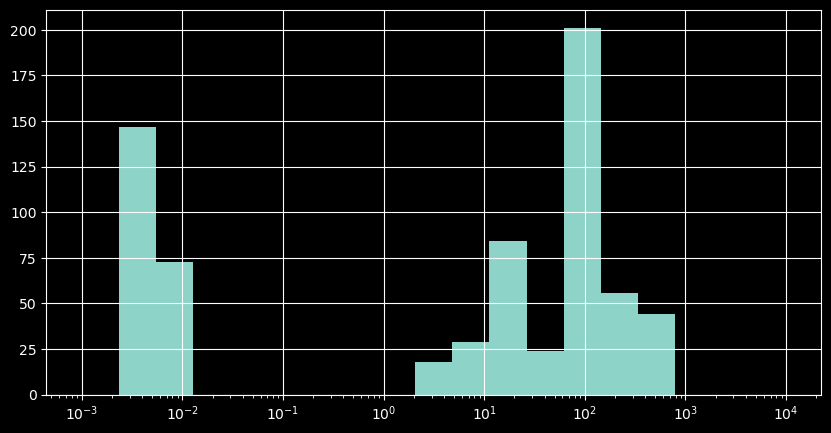

In [30]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sites_agerange["age_min"].hist(bins=np.logspace(-3,4,20))
ax.set_xscale('log')

In [31]:
np.logspace(-3,3,20)

array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])

Creating a simplified geometry of the basin to make the map render faster:

In [32]:
tol=0.00025
sites_agerange["geometry_simple"]=sites_agerange["geometry"].map(lambda x: x.simplify(tol))
sites_agerange.head(n=2)

age_min  age_max                                           geometry  \
SiteID                                                                        
0          56.0     72.1  POLYGON ((-118.43109 34.54266, -118.43099 34.5...   
1          56.0     72.1  POLYGON ((-118.44860 34.55066, -118.44849 34.5...   

                                          geometry_simple  
SiteID                                                     
0       POLYGON ((-118.43109 34.54266, -118.42934 34.5...  
1       POLYGON ((-118.44860 34.55066, -118.44778 34.5...

In [33]:
import plotly.express as px
import plotly
plotly.io.templates.default = 'plotly_dark'

Rendering a map view of the debris flow basins, color-coded by numerical age.

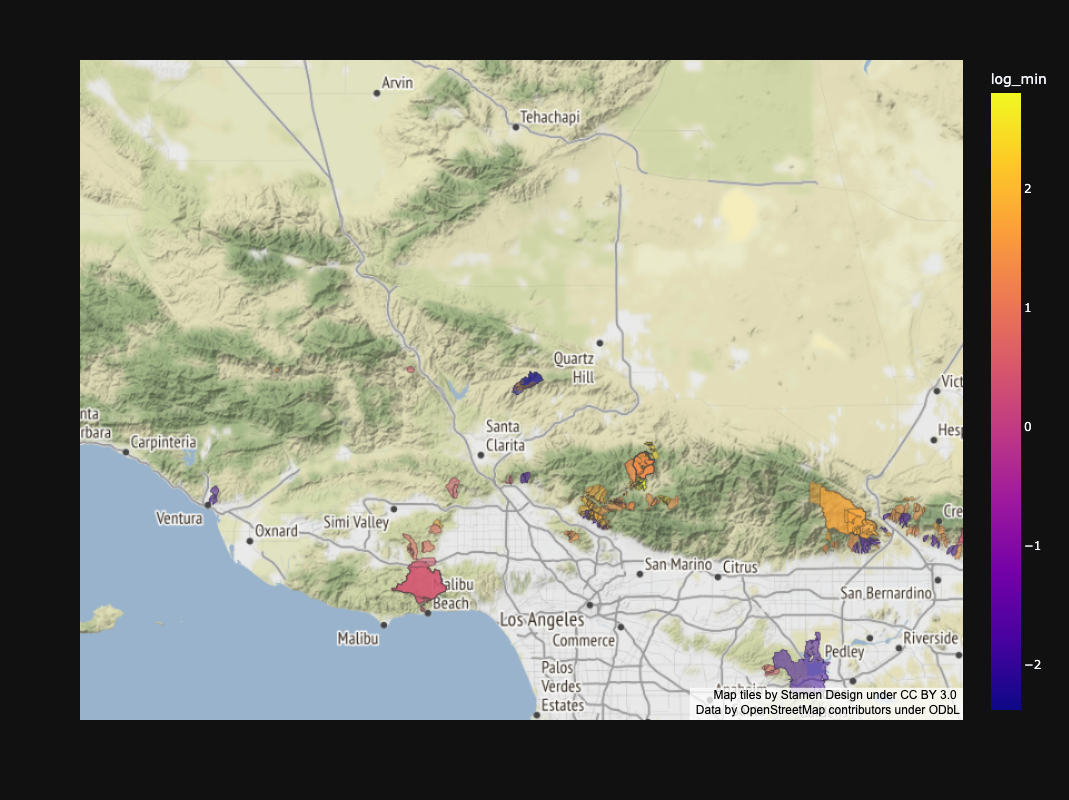

In [34]:
sites_agerange["log_min"]=np.log10(sites_agerange["age_min"])
sites_agerange["log_max"]=np.log10(sites_agerange["age_max"])

fig1=px.choropleth_mapbox(sites_agerange, sites_agerange["geometry_simple"],
                     locations=sites_agerange.index,
                     color="log_min",
                     center={"lon": -118.43, "lat": 34.54},
                     height=800,
                     zoom = 8,
                     hover_data=["age_min","age_max"],
                     mapbox_style="stamen-terrain",
                     opacity=0.5)


fig1

Merge again with geological map to obtain geometry of geological unit(s) intersecting catchment:

In [35]:
mrg2=mrg.merge(poly["geometry"], left_on="index_right", right_index=True,
    suffixes=["_c","_g"], how="inner")

Function to compute fraction of overlap between two geometries:

In [36]:
def getpcentoverlap(p1, p2):
    return p1.intersection(p2).area/p1.area

In [37]:
mrg2["Frac"]=mrg2[["geometry_c","geometry_g"]].apply(lambda x: getpcentoverlap(x[0], x[1]), axis=1)

Return minimum and maximum ages of dominant geological unit within catchment:

In [38]:
def min_dom_unit(group):
    idx=group["Frac"].argmax()
    return group["age_min"].iat[idx]

def max_dom_unit(group):
    idx=group["Frac"].argmax()
    return group["age_max"].iat[idx]

def range_dom_unit(group):
    idx=group["Frac"].argmax()
    return group["age_min"].iat[idx], group["age_max"].iat[idx]

Now aggregate to keep properties of dominant geological unit:

In [39]:
sites_dom_age=pd.DataFrame({"age_min": mrg2.groupby("SiteID").apply(min_dom_unit),
                            "age_max": mrg2.groupby("SiteID").apply(max_dom_unit)})

In [40]:
sites_dom_age.sample(n=5)

age_min  age_max
SiteID                  
488     66.0000   254.14
75       0.0042   541.00
249     66.0000   254.14
715     15.9700    27.82
113      0.0042   541.00

Now load table which contains not just the site properties, but all observations:

In [42]:
stdata=gpd.read_parquet("../../data/data_v04_rocktype_randn.parquet")
stdata=stdata.join(sites_dom_age)
stdata.shape

(1550, 47)

In [43]:
type(stdata)

geopandas.geodataframe.GeoDataFrame

Creating a histogram to compare the debris flow occurence of different geological ages:

In [44]:
nodf=stdata[stdata["response"] == 0]
df=stdata[stdata["response"] == 1]

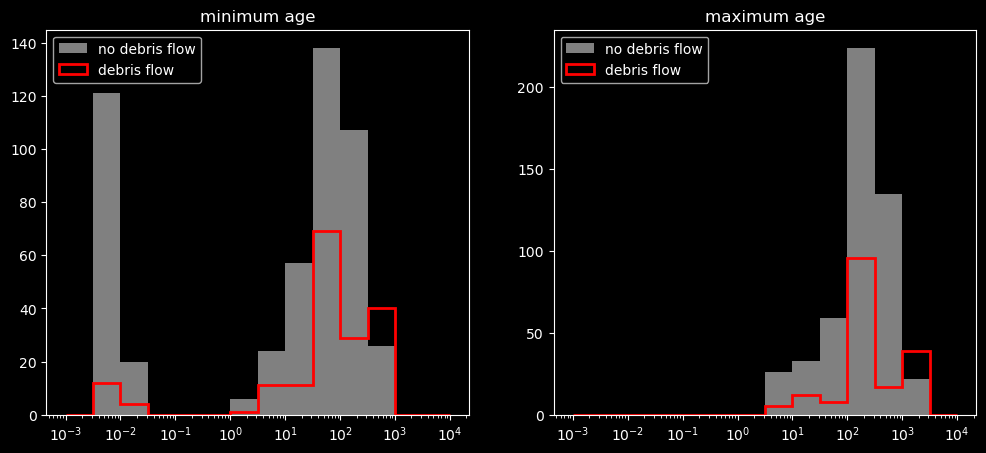

In [45]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
fig,ax=plt.subplots(figsize=(12,5), ncols=2)

bins=np.logspace(-3,4,15)

density=False

label=["minimum age", "maximum age"]

for n, var in enumerate(["age_min", "age_max"]):
    _=ax[n].hist(nodf[var], bins=bins, label="no debris flow", color='gray', density=density)
    _=ax[n].hist(df[var], bins=bins, label="debris flow", histtype="step", 
          color='red', linewidth=2, density=density)
    
    ax[n].legend()
    ax[n].set_xscale('log')
    ax[n].set_title(label[n])

There seems to be a lower frequency of debris flow events in younger geological units (min age < .1 million years) than in older ones.

## Next steps:

1. Scale age to use as a feature (e.g., take log)
2. Deal with missing values
3. Explore the use of metrics other than min/max of dominant unit, e.g., weighted (by coverage area) average of log of age


In [46]:
print(type(stdata),len(stdata))

<class 'geopandas.geodataframe.GeoDataFrame'> 1550


In [47]:
#check how many records have new params missing
stdata['age_max'].isnull().sum()

874

In [48]:
stdata.isnull().sum()

fire_name                        0
year                             0
fire_id                          0
fire_segid                       0
database                         0
state                            0
response                         0
stormdate                        0
gaugedist_m                      0
stormstart                     160
stormend                       160
stormdur_h                       0
stormaccum_mm                    0
stormavgi_mmh                    0
peak_i15_mmh                   230
peak_i30_mmh                   214
peak_i60_mmh                   256
contributingarea_km2             0
prophm23                         0
dnbr1000                        77
kf                               0
acc015_mm                      230
acc030_mm                      214
acc060_mm                      256
geom                             0
lon                              0
lat                              0
SiteID                           0
NB                  

In [49]:
stdata.shape

(1550, 47)

In [50]:
stdata.to_parquet("../../data/data_v05_geological_age.parquet")